# Decision Trees using Scikit-Learn

#### Python Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
%matplotlib inline
plt.style.use('seaborn')

#### Load and Display the Glass Identification Data Set
Source: [UCI Machine Learning Repository - Glass Identification Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data)

**Attribute**

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
    - 1 building_windows_float_processed
    - 2 building_windows_non_float_processed
    - 3 vehicle_windows_float_processed
    - 4 vehicle_windows_non_float_processed (none in this database)
    - 5 containers
    - 6 tableware
    - 7 headlamps

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
glass_df = pd.read_csv(url, header=None)
glass_df = glass_df.drop(glass_df.columns[0], axis=1)
glass_df.columns = ['r_index', 'sodium', 'magnesium', 'aluminum', 'silicon', 'potassium', 'calcium', 'barium', 'iron', 'glass_type']
glass_df

,r_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


#### Display the feature information about the Glass Identification data set

In [4]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   r_index     214 non-null    float64
 1   sodium      214 non-null    float64
 2   magnesium   214 non-null    float64
 3   aluminum    214 non-null    float64
 4   silicon     214 non-null    float64
 5   potassium   214 non-null    float64
 6   calcium     214 non-null    float64
 7   barium      214 non-null    float64
 8   iron        214 non-null    float64
 9   glass_type  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


#### Display the count of each of the glass types

In [5]:
glass_df['glass_type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: glass_type, dtype: int64

#### Create the training and test data sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(glass_df, glass_df['glass_type'], test_size=0.25, random_state=101)

#### ---> No **NEED** for scaling the features

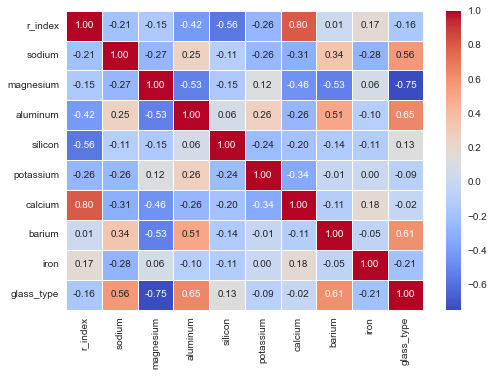

In [7]:
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt='0.2f', linewidth=0.5)
plt.show()

#### Remove the target variable `glass_type` from the training and test feature variables

In [8]:
X_train = X_train.drop('glass_type', axis=1)
X_test = X_test.drop('glass_type', axis=1)

#### Initialize and fit the Decision Tree model

In [9]:
model1 = DecisionTreeClassifier(random_state=101)
model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

#### Predict the target `glass_type` using the test data set

In [10]:
y_predict = model1.predict(X_test)

#### Display the accuracy score

In [11]:
accuracy_score(y_test, y_predict)

0.6111111111111112

#### Display the decision tree

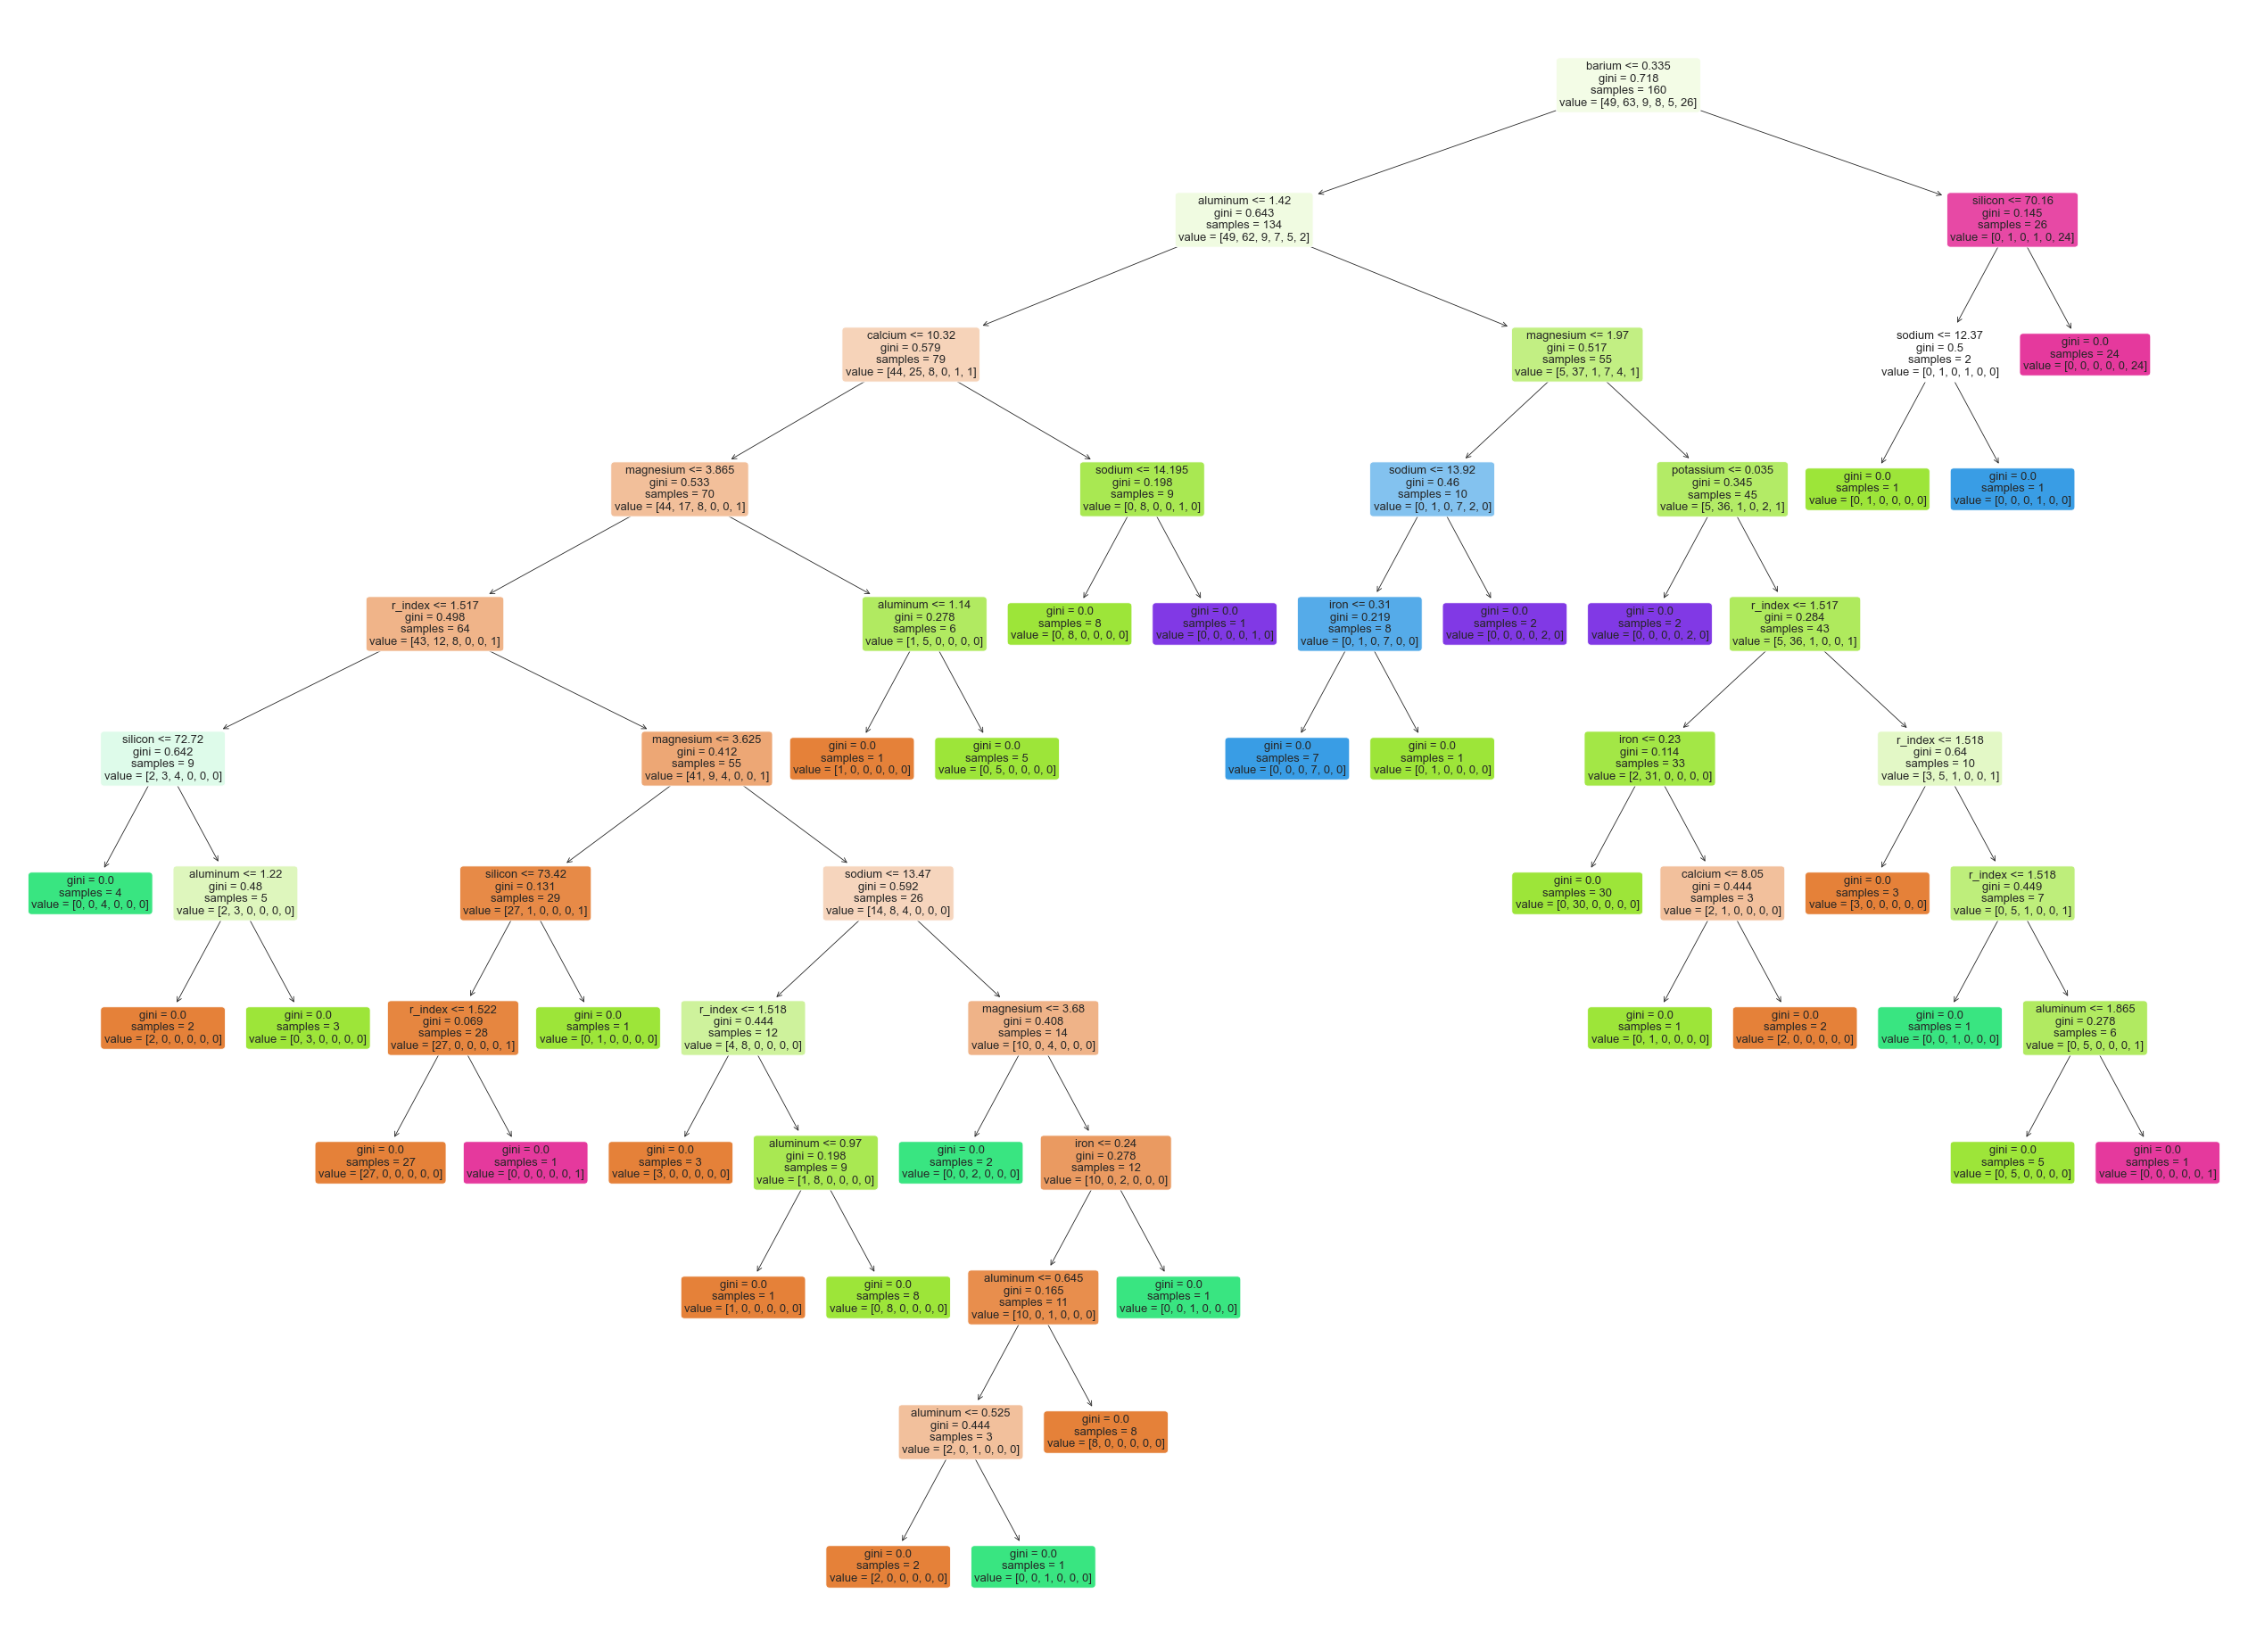

In [12]:
plt.figure(figsize=(16, 12), dpi=200)
### Semicolon at the end will suppress stdout
plot_tree(model1, feature_names=X_test.columns, rounded=True, filled=True);
plt.show()

#### Initialize and fit the Decision Tree model with max_depth of 3

In [13]:
model2 = DecisionTreeClassifier(max_depth=5, random_state=101)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=101)

#### Predict the target `glass_type` using the test data set

In [14]:
y_predict = model2.predict(X_test)

#### Display the accuracy score

In [15]:
accuracy_score(y_test, y_predict)

0.6851851851851852

#### Display the decision tree

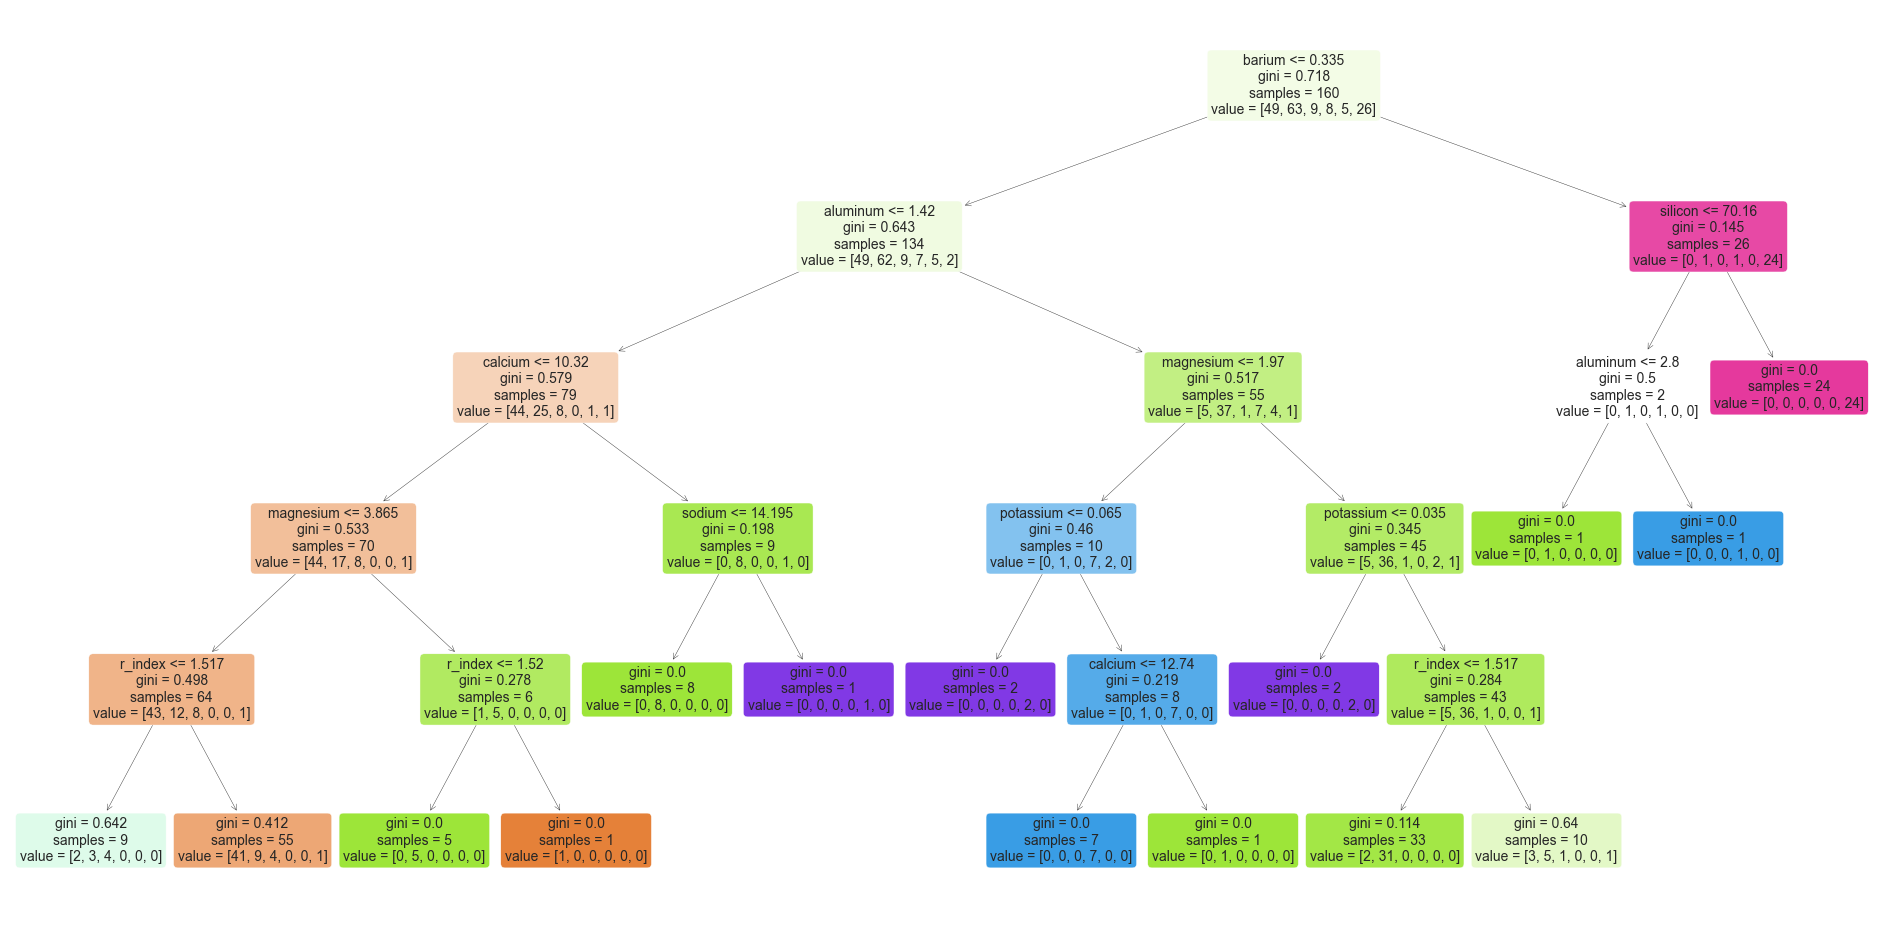

In [16]:
plt.figure(figsize=(24, 12), dpi=100)
### Semicolon at the end will suppress stdout
plot_tree(model2, feature_names=X_test.columns, fontsize=10, rounded=True, filled=True);
plt.show()

#### Decision Tree with max_depth of 3 (for better visualization)

In [17]:
model3 = DecisionTreeClassifier(max_depth=3, random_state=101)
model3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=101)

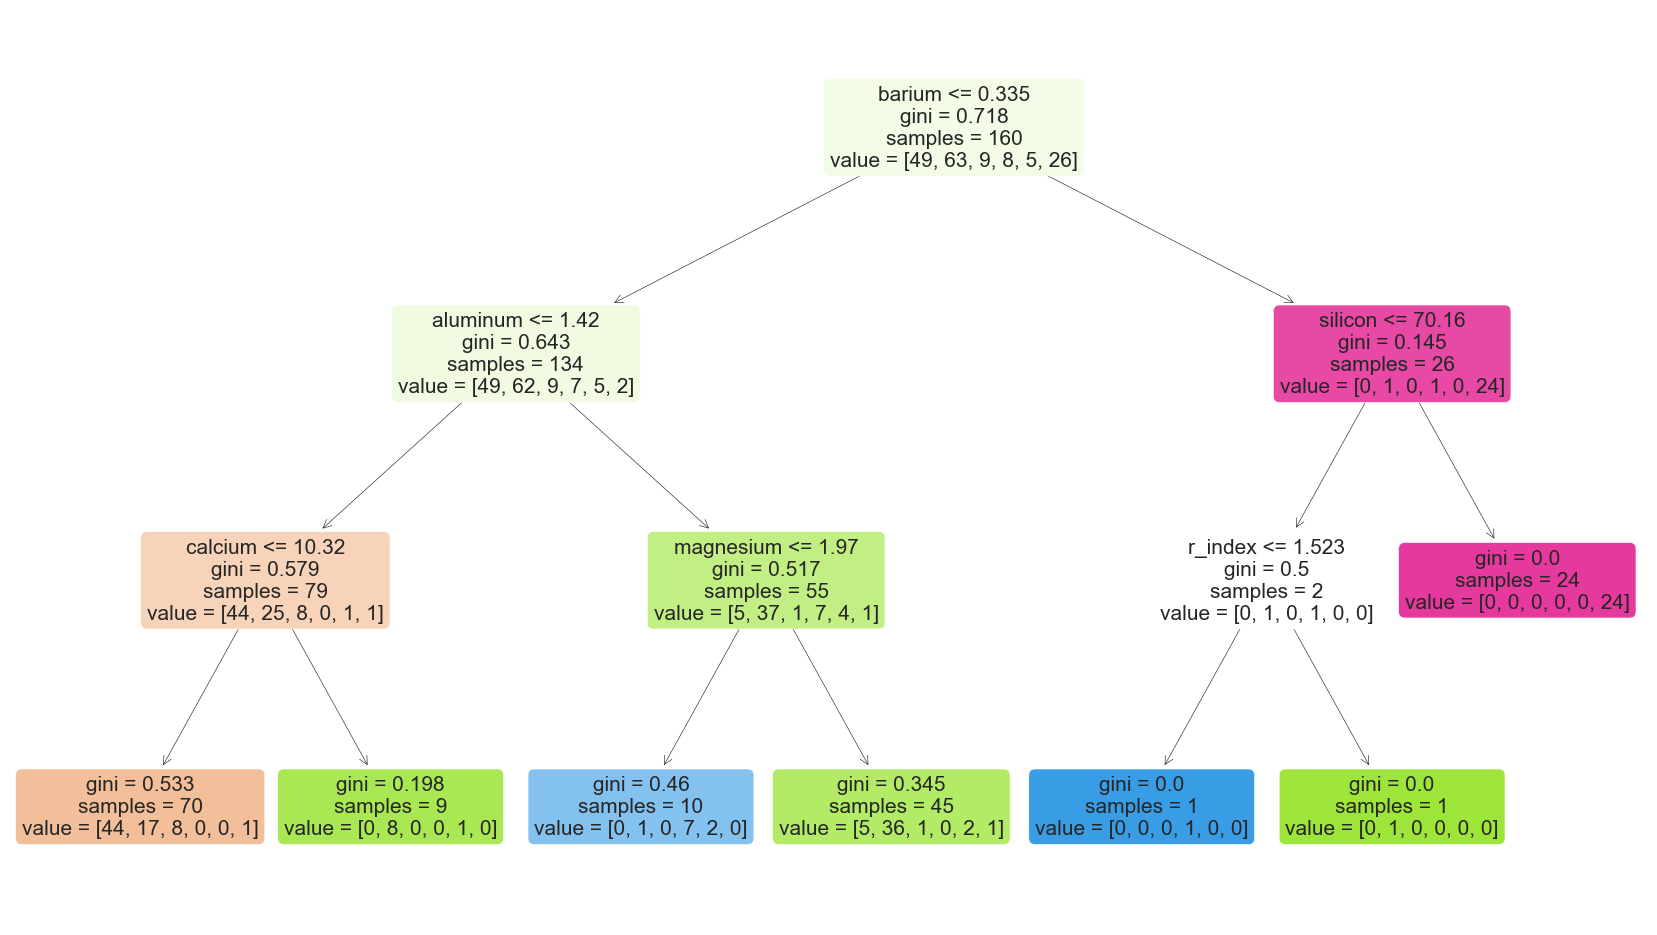

In [18]:
plt.figure(figsize=(14, 8), dpi=150)
### Semicolon at the end will suppress stdout
plot_tree(model3, feature_names=X_test.columns, fontsize=10, rounded=True, filled=True);
plt.show()